In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = '/Users/wonheeyun/Desktop/Movies-ETL/'

In [3]:
with open (f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
kaggle_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings.csv')

In [5]:
len(wiki_movies_raw)

7311

### Is 7,311 a reasonable number of records?
One way to check that 7,311 is reasonable is to look at the rate of movies being released. Rough math is that it's about 7,200 movies over about 30 years. That's about 240 movies released per year, and a little less than 5 movies released per week. That seems a little high if we're considering only major movies, but if for every two major motion pictures, there are three indie films, that doesn't seem like an outlandish number.

Since we're working with a list of dictionaries, we'll use index slices to select specific chunks of `wiki_movies_raw` to inspect directly. This is also a great use case for negative index slices.

In [6]:
# Turning the list of dicts into a Dataframe
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
1813,https://en.wikipedia.org/wiki/The_Substitute,1996.0,https://www.imdb.com/title/tt0117774/,The Substitute,Robert Mandel,"[Morrie Eisenman, Jim Steele]",NaN,NaN,NaN,"[Tom Berenger, Ernie Hudson, Diane Venora, Gle...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6572,https://en.wikipedia.org/wiki/Danny_Collins_(f...,2015.0,https://www.imdb.com/title/tt1772288/,Danny Collins,Dan Fogelman,"[Nimitt Mankad, Jessie Nelson, Denise Di Novi,...",NaN,NaN,NaN,"[Al Pacino, Annette Bening, Jennifer Garner, B...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7004,https://en.wikipedia.org/wiki/All_I_See_Is_You...,2017.0,https://www.imdb.com/title/tt4486986/,All I See Is You,Marc Forster,"[Craig Baumgarten, Jillian Kugler, Brian Wilkins]",NaN,NaN,NaN,"[Blake Lively, Jason Clarke, Ahna O'Reilly, Yv...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6060,https://en.wikipedia.org/wiki/A_Glimpse_Inside...,2013.0,https://www.imdb.com/title/tt2044729/,A Glimpse Inside the Mind of Charles Swan III,Roman Coppola,"[Roman Coppola, Youree Henley]",NaN,NaN,NaN,"[Charlie Sheen, Katheryn Winnick, Bill Murray,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857,https://en.wikipedia.org/wiki/Sniper_(1993_film),1993.0,https://www.imdb.com/title/tt0108171/,Sniper,Luis Llosa,Robert L. Rosen,NaN,NaN,NaN,"[Tom Berenger, Billy Zane, J. T. Walsh]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Checking the columns to see if there's anything not related to movies
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

## Use List Comprehensions to Filter Data

In [8]:
# iterating through dicts to filter out any dicts that do not meet the condition
# The resulting list will only have elements where the filter expression evaluates to True.

wiki_movies = [movie for movie in wiki_movies_raw
               if ('director' in movie or 'Directed by' in movie)
                and 'imdb_link' in movie
                and 'No. of episodes' not in movie]

In [9]:
len(wiki_movies)

7074

In [10]:
wiki_df = pd.DataFrame(wiki_movies)
wiki_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
648,https://en.wikipedia.org/wiki/Tom_and_Jerry:_T...,1992,https://www.imdb.com/title/tt0105616/,Tom and Jerry: The Movie,Phil Roman,Phil Roman,Dennis Marks,NaN,"[Tom and Jerry, by, William Hanna, and, Joseph...","[Richard Kind, Dana Hill, Anndi McAfee, Sydney...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,https://en.wikipedia.org/wiki/Night_Falls_on_M...,1997,https://www.imdb.com/title/tt0119783/,Night Falls on Manhattan,Sidney Lumet,"[Thom Mount, Josh Kramer, John Starke]",NaN,NaN,NaN,"[Andy García, Richard Dreyfuss, Lena Olin, Ian...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1568,https://en.wikipedia.org/wiki/The_Frighteners,1996,https://www.imdb.com/title/tt0116365/,The Frighteners,Peter Jackson,"[Peter Jackson, Jamie Selkirk]",NaN,NaN,NaN,"[Michael J. Fox, Trini Alvarado, Peter Dobson,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5775,https://en.wikipedia.org/wiki/The_Bling_Ring,2013,https://www.imdb.com/title/tt2132285/,The Bling Ring,Sofia Coppola,"[Roman Coppola, Sofia Coppola, Youree Henley]",Sofia Coppola,NaN,"[The Suspects Wore Louboutins, by, Nancy Jo Sa...","[Katie Chang, Israel Broussard, Emma Watson, C...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1678,https://en.wikipedia.org/wiki/The_People_vs._L...,1996,https://www.imdb.com/title/tt0117318/,The People vs. Larry Flynt,Miloš Forman,"[Oliver Stone, Janet Yang, Michael Hausman]",NaN,NaN,NaN,"[Woody Harrelson, Courtney Love, Edward Norton]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create a function to clean the data

In [11]:
def clean_movie(movie):
    movie = dict(movie) 
    # 'movie' will refer to the local copy in the 'clean_movie' function.
    # Any changes we make inside 'clean_movie' will only affect the local copy
    return movie

In [12]:
wiki_df[wiki_df["Arabic"].notnull()]["url"]

6832    https://en.wikipedia.org/wiki/The_Insult_(film)
7056     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [13]:
sorted(wiki_df.columns.to_list())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Language',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Release date',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplified',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 

## Handle the Alternative Titles & Combine Similar Column Names

In [14]:
#Step 1: Make an empty dictionary to hold all the alternative titles
#Step 2: Loop through a list of all alternative title keys
#Step 2a: Check if the current key exists in the movie object
#Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary
#Step 3: After looping through every key, add the alternative titles dict to the movie object

def clean_movie(movie):
    movie = dict(movie) 
    #Step 1: Make an empty dictionary to hold all the alternative titles
    alt_titles = {}
    #Step 2: Loop through a list of all alternative title keys
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        # Step 2a: Check if the current key exists in the movie object.
        if key in movie:
            #Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary
            alt_titles[key] = movie[key]
            movie.pop(key)
    #Step 3: After looping through every key, add the alternative titles dict to the movie object.
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
    ## Merge column names ##
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
            
    return movie

In [15]:
# Create a list of cleaned movies with a list comprehension
clean_movies = [clean_movie(movie) for movie in wiki_movies]

# Set wiki_movies_df to be the data frame created from clean_movies and print out a list of the columns
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributed by',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [16]:
wiki_movies_df

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Distributed by,Release date,...,Picture format,Audio format,Voices of,Followed by,Created by,Preceded by,Suggested by,alt_titles,Animation by,Color process
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,Paramount Pictures,"December 19, 1990",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",NaN,Oliver Wood,Sony Pictures Releasing,"[December 25, 2018, (, 2018-12-25, ), (United ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7070,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",NaN,Greig Fraser,Mirror Releasing,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7071,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",NaN,Michael Grady,Focus Features,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7072,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",NaN,Julie Kirkwood,Mirror Releasing,"[August 31, 2018, (, 2018-08-31, ), (, Telluri...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove Duplicate Rows
RegEx is used to search for patterns in text

In [17]:
# First, extract the IMDb ID from the IMDb link using regular expressions and str.extract()
# IMDb links generally look like "https://www.imdb.com/title/tt1234567/," with "tt1234567" as the IMDb ID

# Extract the IMDb ID
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))

#Drop duplicates of IMDb IDs using drop_duplicates()
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7074
7031


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Distributed by,Release date,...,Audio format,Voices of,Followed by,Created by,Preceded by,Suggested by,alt_titles,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,Paramount Pictures,"December 19, 1990",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


## Remove mostly null columns

In [18]:
# get the count of null values for each column
[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4850],
 ['Starring', 182],
 ['Narrated by', 6750],
 ['Cinematography', 689],
 ['Distributed by', 493],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 234],
 ['Language', 242],
 ['Budget', 2293],
 ['Box office', 1546],
 ['Director', 0],
 ['Editor(s)', 546],
 ['Composer(s)', 516],
 ['Producer(s)', 202],
 ['Production company(s)', 1676],
 ['Writer(s)', 197],
 ['Genre', 6923],
 ['Original language(s)', 6873],
 ['Original network', 6906],
 ['Executive producer(s)', 6934],
 ['Production location(s)', 6984],
 ['Distributor', 6893],
 ['Picture format', 6967],
 ['Audio format', 6970],
 ['Voices of', 7029],
 ['Followed by', 7022],
 ['Created by', 7021],
 ['Preceded by', 7021],
 ['Suggested by', 7030],
 ['alt_titles', 7010],
 ['Animation by', 7029],
 ['Color process', 7030],
 ['imdb_id', 0]]

In [19]:
len(wiki_movies_df) * 0.9

6327.900000000001

In [20]:
#We want a list of columns that have less than 90% null values
#The output gives us the columns that we want to keep
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [21]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Distributed by,Release date,Running time,...,Language,Budget,Box office,Director,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,English,$20 million,$21.4 million,Renny Harlin,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,English,$6 million,$2.7 million,James Foley,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,"[English, Lao]",$35 million,"$57,718,089",Roger Spottiswoode,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,English,$12 million,"$7,331,647",Woody Allen,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,Paramount Pictures,"December 19, 1990",95 minutes,...,English,$25 million,"$6,939,946 (USA)",John Cornell,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


## Convert and Parse Data

In [22]:
#Identify which columns need to be converted
wiki_movies_df.dtypes

#Box office should be numeric
#Budget should be numeric
#Release date should be date object
#Running time should be numeric

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Distributed by           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [23]:
#Look for rows where the box office data is defined and make a data series that drops missing values
box_office = wiki_movies_df['Box office'].dropna()
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7068       $19.4 million
7069       $41.9 million
7070       $76.1 million
7071       $38.4 million
7072        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [24]:
# Regular expressions only work on string, so we need to make sure box office data is entered as a string
def is_not_a_string(x):
    return type(x) != str

In [25]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6978               [$99.6, million, [4], [5]]
6992                   [$365.6, million, [1]]
6993                         [$53.8, million]
7013                     [$435, million, [7]]
7046                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

Having to create a new function every time we want to use the map() method is cumbersome 
and interrupts the readability of our code.

We also don't need to use the function outside of the map() call.

Instead of creating a new function with a block of code and the def keyword, we can create an anonymous lambda function inside the map() call


In [26]:
# The lambda version of 'is_not_a_string' function is:
box_office[box_office.map(lambda x: type(x) != str)]

# We can see that quite a few data points are stored as lists

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6978               [$99.6, million, [4], [5]]
6992                   [$365.6, million, [1]]
6993                         [$53.8, million]
7013                     [$435, million, [7]]
7046                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [27]:
#In order to concatenate the items on the list, we need to make a separator string and then use the join() method
#The space is the joining character
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [28]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7068       $19.4 million
7069       $41.9 million
7070       $76.1 million
7071       $38.4 million
7072        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [29]:
#Many of the office box numbers are written like "\$123.4 million" or "\$123,456,789"
#Thus, we need to use regular expressions to find out how many of each style is in the data
#There is a built-in dependency for regular expressions: re

# Parse the Box Office Data

## Create the first form

In [30]:
# The pattern will need to match 6 elements:
# Step 1) a dollar sign: 
# - The dollar sign is a special character in regular expressions, so we'll need to escape it with "\"
# - "\$"

# Step 2) an arbitrary (but non-zero) number of digits:
# - add the \d character to specify digits only, and the + modifier to capture one or more digits
# - "\$\d+"

# Step 3) an optional decimal point - use a question mark modifier:
# - the decimal point is a special character, so it needs to be escaped with a backslash.
# - Since the decimal point is optional, add a question mark modifier after it
# - "\$\d+\.?"

# Step 4) an arbitrary (but possibly zero) number of more digits 
# - use a * modifier because there may not be any digits after the decimal point
# "\$\d+\.?\d*"

# Step 5) a space (possibily more than one):
# - use \s to match whitespace and a * modifier to match any number of whitespace
# - "\$\d+\.?\d*\s*"

# Step 6) the word "million" or "billion" 
# - use [] to match with a character set for the first letter
# - "\$\d+\.?\d*\s*[mb]illion"

# Step 7) a variable "form_one" for the finished regular expression:
# - Because we need the escape characters to remain, we need to preface the string with an 'r'
form_one = r"\$\d+\.?\d*\s*[mb]illion"

In [31]:
# Now, to count up how many box office values match our first form. 
# We'll use the str.contains() method on box_office. 
# To ignore whether letters are uppercase or lowercase, add an argument called flags, 
# and set it equal to re.IGNORECASE. 
# In case the data is not a string, we'll add the na=False argument to parse the non-string data to False. 
# Finally, we can call the sum() method to count up the total number that return True
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

## Create the Second Form

Next, we'll match the numbers of our second form, "$123,456,789." In words, our pattern match string will include the following elements:

1) A dollar sign

2) A group of one to three digits

3) At least one group starting with a comma and followed by exactly three digits

In [32]:
# Step 1) A dollar sign:
# - "\$"

# Step 2) a group of one to three digits:
# - modify "\d" with curly brackets to only match one through three repetitions
# - "\$\d{1,3}"

# Step 3) 
# To match a comma and exactly three digits, we'll use the string ",\d{3}". 
# To match any repetition of that group, we'll put it inside parentheses, 
# and then put a plus sign after the parentheses: "(,\d{3})+". 
# We'll add one more modification to specify that this is a non-capturing group 
# by inserting a question mark and colon after the opening parenthesis: "(?:,\d{3})+"

form_two = r"\$\d{1,3}(?:,\d{3})+"
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

## Compare Values in Forms

Most of the box office values are described by either form. Now we want to see which values aren't described by either. To be safe, we should see if any box office values are described by both.

Create two Boolean Series called matches_form_one and matches_form_two, and then select the box office values that don't match either.

In [33]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [34]:
#This will render an error:
    #box_office[(not matches_form_one) and (not matches_form_two)]

#Pandas has element-wise logical operators:
    # element-wise negation operator: ~ (similar to "not")
    # element-wise logical "and": &
    # element-wise logical "or": |
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1069                          35,254,617
1146    $ 407,618 (U.S.) (sub-total) [1]
1444                        $ 11,829,959
1478                          £3 million
1609                            $520.000
1863                        ¥1.1 billion
2030                                 N/A
2089                                $309
2128               US$ 171.8 million [9]
2255                   US$ 3,395,581 [1]
2261            $ 1,223,034 ( domestic )
2345                            $282.175
2636            $ 104,883 (US sub-total)
2663         926,423 admissions (France)
2695      $ 1.7 million (US) (sub-total)
2821                            $414.000
2922                            $621.000
3086           $

## Fix Pattern Matches
We can fix our pattern matches to capture more values by addressing these issues:

1. Some values have spaces in between the dollar sign and the number.

2. Some values use a period as a thousands separator, not a comma.

3. Some values are given as a range.

4. "Million" is sometimes misspelled as "millon."

In [35]:
# Step 1) Some values have spaces in between the dollar sign and the number.
# - Just add \s* after the dollar signs. 
form_one = r"\$\s*\d+\.?\d*\s*[mb]illion"
form_two = r"\$\s*\d{1,3}(?:,\d{3})+"

In [36]:
# Step 2) Some values uses a period as a thousands separator, not a comma
# - Simply change form_two to allow for either a comma or period as a thousands separator. 
# - We’d ordinarily do that by putting the comma and period inside straight brackets [,.], 
#- but the period needs to be escaped with a slash [,\.]
form_two = r"\$\s*\d{1,3}(?:[,\.]\d{3})+"

In [37]:
# NOTE:
# The results above will also match values like 1.234 billion, 
# but we're trying to change raw numbers like $123.456.789. 
# We don't want to capture any values like 1.234 billion, 
# so we need to add a negative lookahead group that looks ahead for "million" or "billion" 
# after the number and rejects the match if it finds those strings. Don't forget the space!
form_two = r"\$\s*\d{1,3}(?:[,\.]\d{3})+(?![mb]illion)"

In [38]:
# Step 3) Some values are given as a range
# To solve this problem, we'll search for any string that starts with a dollar sign and ends with a hyphen, 
# and then replace it with just a dollar sign using the replace() method. 
# The first argument in the replace() method is the substring that will be replaced, 
# and the second argument in the replace() method is the string to replace it with. 
# We can use regular expressions in the first argument by sending the parameter regex=True
box_office = box_office.str.replace(r'\$.*[-–—](?![a-z])', '$', regex=True)

In [39]:
# Step 4) "Million" is sometimes mispelled as "millon"
# - Make the second "i" optional with "?" that follows it
form_one = r"\$\s*\d+\.?\d*\s*[mb]illi?on"

## Extract and Convert the Box Office Values

In [40]:
# Create a regular expression that captures data when it matches either form_one or form_two
# str.extract() method takes in a regular expression string, 
# but it returns a DataFrame where every column is the data that matches a capture group
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7068,$19.4 million
7069,$41.9 million
7070,$76.1 million
7071,$38.4 million


In [41]:
# We need a function to turn the extracted values into a numeric value. 
# We'll call it parse_dollars, and parse_dollars will take in a string and return a floating-point number.
# Use re.match(pattern,string) to see if the string matches a pattern
# Use re.sub(pattern, replacement_string, string) to remove dollar signs, spaces, commas, and letters

def parse_dollars(s):
    #if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    #if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a million
        value = float(s) * 10**6
        # return value
        return value
    
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        # return value
        return value
    
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub('\$|,', '', s)
        # convert to float
        value = float(s)
        # return value
        return value
    # otherwise, return NaN
    else:
        return np.nan

In [48]:
wiki_movies_df["box_office"] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df["box_office"]

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7069    41900000.0
7070    76100000.0
7071    38400000.0
7072     5500000.0
7073           NaN
Name: box_office, Length: 7031, dtype: float64

In [51]:
wiki_movies_df.drop("Box office", axis = 1, inplace=True)
wiki_movies_df.head()

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,url,year,imdb_link,title,Based on,Starring,Cinematography,Distributed by,Release date,Running time,...,Language,Budget,Director,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,English,$20 million,Renny Harlin,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,English,$6 million,James Foley,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,"[English, Lao]",$35 million,Roger Spottiswoode,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,English,$12 million,Woody Allen,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,Paramount Pictures,"December 19, 1990",95 minutes,...,English,$25 million,John Cornell,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0


## Parse the Budget Data

In [52]:
# Create a budget variable
budget = wiki_movies_df["Budget"].dropna()
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7068    €4.3 million
7069     $42 million
7070     $60 million
7071     $20 million
7072      $9 million
Name: Budget, Length: 4738, dtype: object

In [53]:
# Convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7068    €4.3 million
7069     $42 million
7070     $60 million
7071     $20 million
7072      $9 million
Name: Budget, Length: 4738, dtype: object

In [54]:
# Remove any values between a dollar sign and a hypen (for budgets given in ranges)
budget = budget.str.replace(r'\$.*[-–—](?![a-z])', '$', regex=True)
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7068    €4.3 million
7069     $42 million
7070     $60 million
7071     $20 million
7072      $9 million
Name: Budget, Length: 4738, dtype: object

In [55]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
972             $34 [3] [4] million
1125               $120 [4] million
1225                        Unknown
1277                            HBO
1372                     £6,000,000
1395                     13 million
1478                   £2.8 million
1732                   CAD2,000,000
1911     PHP 85 million (estimated)
1946                    102,888,900
1951                   3,500,000 DM
1971                     ₤2,300,874
2279                     $14 milion
2449                     ₤6,350,000
3142                   € 40 million
3358               $150 [6] million
3416                        $218.32
3800                   £4.2 million
3904                            N/A
3957                    760,000 USD
4468                       19 crore
4639                    £17 million
5032              $$200 [4] million
5053           $155 [2] [3] million
5417                $40 [4] 

In [56]:
budget = budget.str.replace('\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
972                     $34 million
1125                   $120 million
1225                        Unknown
1277                            HBO
1372                     £6,000,000
1395                     13 million
1478                   £2.8 million
1732                   CAD2,000,000
1911     PHP 85 million (estimated)
1946                    102,888,900
1951                   3,500,000 DM
1971                     ₤2,300,874
2279                     $14 milion
2449                     ₤6,350,000
3142                   € 40 million
3358                   $150 million
3416                        $218.32
3800                   £4.2 million
3904                            N/A
3957                    760,000 USD
4468                       19 crore
4639                    £17 million
5032                  $$200 million
5053                   $155 million
5417                    $40 

In [59]:
# Parse the budget values
wiki_movies_df["budget"] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
# Drop the original budget column
wiki_movies_df.drop("Budget", axis = 1, inplace = True)
wiki_movies_df.head()

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,url,year,imdb_link,title,Based on,Starring,Cinematography,Distributed by,Release date,Running time,...,Language,Director,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,20th Century Fox,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,English,Renny Harlin,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,English,James Foley,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,TriStar Pictures,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,"[English, Lao]",Roger Spottiswoode,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Orion Pictures,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,English,Woody Allen,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,12000000.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,Paramount Pictures,"December 19, 1990",95 minutes,...,English,John Cornell,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,25000000.0


## Parse Release Date

In [62]:
# Make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings
release_date = wiki_movies_df["Release date"].dropna().apply(lambda x: ' '.join(x) if type(x)==list else x)

In [64]:
# The forms we'll be parsing are:
# 1. Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'

# 2. Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
date_form_two = r'\d{4}.[01]\d.[123]\d'

# 3. Full month name, four-digit year (i.e., January 2000)
date_form_three = '(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'

# 4. Four-digit year
date_form_four = r'\d{4}'

In [66]:
# Extract Dates
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7069,"December 25, 2018"
7070,"December 11, 2018"
7071,"November 8, 2018"
7072,"August 31, 2018"


In [67]:
# Instead of creating our own function to parse the dates, we'll use the built-in to_datetime() method in Pandas
# Since there are different date formats, set the infer_datetime_format option to True
# The date formats we've targeted are among those that the to_datetime() function can recognize
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)
wiki_movies_df['release_date']

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7069   2018-12-25
7070   2018-12-11
7071   2018-11-08
7072   2018-08-31
7073   2018-12-01
Name: release_date, Length: 7031, dtype: datetime64[ns]

In [69]:
# Drop the original Release Date column
wiki_movies_df.drop("Release date", axis = 1, inplace = True)
wiki_movies_df.head()

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,url,year,imdb_link,title,Based on,Starring,Cinematography,Distributed by,Running time,Country,...,Director,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,20th Century Fox,102 minutes,United States,...,Renny Harlin,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0,1990-07-11
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Avenue Pictures,114 minutes,United States,...,James Foley,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0,1990-05-17
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,TriStar Pictures,113 minutes,United States,...,Roger Spottiswoode,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0,1990-08-10
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Orion Pictures,106 minutes,United States,...,Woody Allen,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,12000000.0,1990-12-25
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,Paramount Pictures,95 minutes,US,...,John Cornell,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,25000000.0,1990-12-19


## Parse Running Time

In [79]:
# make a variable that holds the non-null values of Running time in the DataFrame, converting lists to strings
running_time = wiki_movies_df["Running time"].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7069                               90 minutes
7070                              132 minutes
7071                              120 minutes
7072                              123 minutes
7073    Variable; 90 minutes for default path
Name: Running time, Length: 6892, dtype: object

In [80]:
# Determine the number of running times that follow the format "100 minutes" using string boundaries
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [81]:
# View what the other data formats look like
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6498       114 minutes [1] 120 minutes (extended edition)
6641                                             104 mins
6707    90 minutes (theatrical) [1] 91 minutes (unrate...
7055    108 minutes (Original cut) 98 minutes (UK cut)...
7073                Variable; 90 minutes for default path
Name: Running time, Length: 364, dtype: object

In [82]:
# Make it more general by marking the beginning of the string and accepting other abbreviations of 'minutes'
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6876

In [83]:
# View the remaining running times
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1441    United States: 77 minutes Argentina: 94 minute...
1497                                            1hr 35min
1549                                               varies
1772                    Netherlands:96 min, Canada:95 min
1775                                       approx. 14 min
2271                                           1 h 43 min
2991                                               1h 48m
3923                                              4 hours
4423    US domestic version: 86 minutes Original versi...
4965    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5422                    115 [1] /123 [2] /128 [3] minutes
5445                                    1 hour 32 minutes
7073                Variable; 90 minutes for default path
Name: Running time, dtype: object

In [84]:
#Match all hour+minute patterns with one regular expression pattern:
#1.) start with one or more digits
#2.) have an optional space after the digit and before the letter 'h'
#3.) captuer all possible abbreviations of 'hour(s).' (We would make every letter in 'hours' optional except the 'h')
#4.) have an optional space after the 'hours' marker
#5.) have an optional number of digits for minutes
# Add capture groups and alternating characters to ensure that we extract the digits and allow for both possible patterns
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7069,NaN,NaN,90
7070,NaN,NaN,132
7071,NaN,NaN,120
7072,NaN,NaN,123


In [85]:
# We need to convert this new data frame from strings to numeric values. Since we may have captured empty strings,
# we'll use the to_numeric() method and set the errors argument to 'coerce'. 
# Coercing the errors will turn the empty strings into Not a Number (NaN). 
# Then use fillna() to change all NaNs to zeros
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract


,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7069,0.0,0.0,90.0
7070,0.0,0.0,132.0
7071,0.0,0.0,120.0
7072,0.0,0.0,123.0


In [86]:
# Apply a function that converts the hour capture groups and minute capture groups to minutes 
# if the pure minute capture group is zero and save the output to wiki_movies_df
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df['running_time']

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7069     90.0
7070    132.0
7071    120.0
7072    123.0
7073     90.0
Name: running_time, Length: 7031, dtype: float64

In [87]:
# Drop Running time from the data set
wiki_movies_df.drop('Running time', axis=1, inplace=True)
wiki_movies_df.head()

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,url,year,imdb_link,title,Based on,Starring,Cinematography,Distributed by,Country,Language,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,20th Century Fox,United States,English,...,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0,1990-07-11,102.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Avenue Pictures,United States,English,...,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0,1990-05-17,114.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,TriStar Pictures,United States,"[English, Lao]",...,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0,1990-08-10,113.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Orion Pictures,United States,English,...,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0,12000000.0,1990-12-25,106.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,Paramount Pictures,US,English,...,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0,25000000.0,1990-12-19,95.0


## Clean Kaggle Data

In [88]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [89]:
#Before converting the 'adult' and 'video' columns, check that all values are either True or False
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

## Remove Bad Data

In [91]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# The following code will keep rows where the adult column is False, and then drop the adult column.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult']=='False'].drop('adult', axis='columns')
kaggle_metadata

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


## Convert Data Types

In [93]:
# check the values of 'video' column
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [94]:
# Create a Boolean column and assign it back to 'video'
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [98]:
# For the numeric columns, we can just use the to_numeric() method from Pandas. 
# Set the errors= argument is set to 'raise', so we'll know if there's any data that can't be converted to numbers.
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [99]:
# Convert release_date to datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

## Reasonability Checks on Rating Data

In [101]:
# View the ratings data with the info() method
ratings.info(null_counts=True)

/Users/wonheeyun/opt/miniconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [102]:
# Specify that the origin is 'unix' and the time unit is in seconds
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [103]:
# These dates don't seem outlandish—the years are within expected bounds, 
# and there appears to be some consistency from one entry to the next. 
# Since the output looks reasonable, assign it to the timestamp column.
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

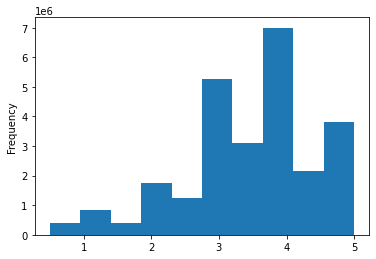

In [104]:
# Look at the statistics of the actual ratings and see if there are any glaring errors
# A quick, easy way to do this is to look at a histogram of the rating distributions, 
# and then use the describe() method to print out some stats on central tendency and spread.
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

That seems to make sense. People are more likely to give whole number ratings than half, which explains the spikes in the histogram

## Merge Kaggle and Wikipedia Metadata

In [105]:
#Print out a list of columns so that we can identify which ones are redundant
#Use the suffix parameter to make it easier to identify which table each column came frome
movies_df = pd.merge(wiki_movies_df,  kaggle_metadata, on='imdb_id', suffixes=['_wiki', '_kaggle'])
movies_df.head()

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Distributed by,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,20th Century Fox,United States,English,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Avenue Pictures,United States,English,...,1990-08-24,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,TriStar Pictures,United States,"[English, Lao]",...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Orion Pictures,United States,English,...,1990-12-25,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,Paramount Pictures,US,English,...,1990-12-21,0.00,95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00


In [ ]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop wikipedia
# running_time             runtime                  Keep Kaggle; fill in zeros with Wikipedia data.
# budget_wiki              budget_kaggle            Keep Kaggle; fill in zeros with Wikipedia data.
# box_office               revenue                  Keep Kaggle; fill in zeros with Wikipedia data.
# release_date_wiki        release_date_kaggle      Drop wikipedia
# Language                 original_language        Drop wikipedia
# Production company(s)    production_companies     Drop wikipeida

## Title

In [106]:
#View the titles
movies_df[['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [107]:
# Look at the rows in which the titles do not match
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [108]:
# Both options look pretty good, but the Kaggle data looks just a little bit more consistent. 
# Let's confirm there aren't any missing titles in the Kaggle data with the following code:
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Distributed by,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


## Runtime

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

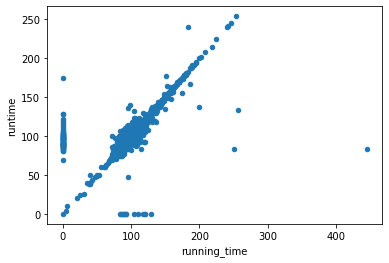

In [109]:
# Compare running_time and runtime with a scatter plot. 
# If the two columns are the same, then we will get a perfectly straight line.
# Scatter plots do not show null values, so we will need to fill missing values with zeros
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

Notice that there are more data points on the origin of the Y axis than on the origin of the X axis.

This means that there are more missing entries in the Wikipedia data. It also seems like Wikipedia data has some outliers

Although there are some gaps in the data for Kaggle, we can fill them with the Wikipedia data.

## Budget

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

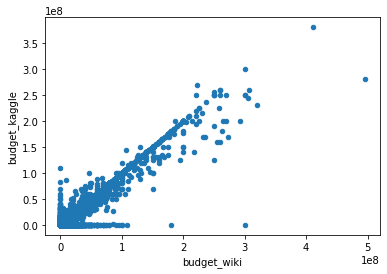

In [110]:
#Since budget_wiki and budget_kaggle are numeric, we can make another scatter plot to compare values
movies_df.fillna(0).plot(x='budget_wiki', y='budget_kaggle', kind='scatter')

The Wikipedia data appears to have more outliers. But there also seems to be quite a few missing data with Kaggle.

Here are some questions to consider when interpreting this scatter plot:

1. Which dataset seems to have more outliers?
2. Which dataset seems to have more missing data points?
3. If we were to fill in the missing data points of one set with the other, which would be more likely to give us consistent data?
4. Is it better to start with a base of consistent data and fill in missing points with possible outliers? Or is it better to start with a base of data with outliers and fill in missing points with more consistent data?

## Box Office

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

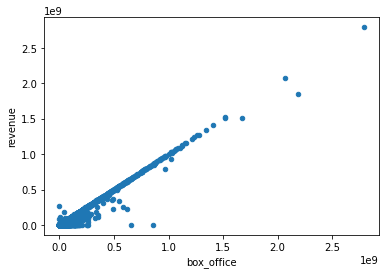

In [118]:
#box_office and revenue are also numeric, so we can proceed with another scatter plot
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

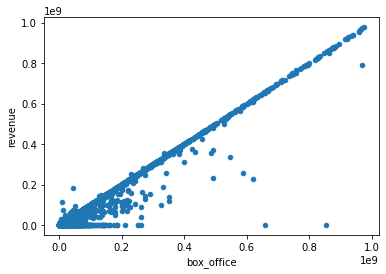

In [119]:
#Zoom in on everything less than $1 billion in box_office
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

#This plot looks similar to what we've seen for budget, so we'll make the same decision.

## Release Date

<AxesSubplot:xlabel='release_date_wiki'>

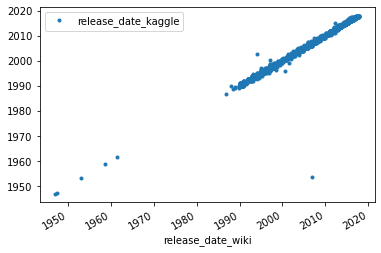

In [111]:
# Because release_date_wiki and release_date_kaggle aren't numeric data, we can't use a scatter plot.
# However, we can work around it with a regular line plot and change the style to put only dots
movies_df[['release_date_wiki', 'release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [112]:
# Investigate the wild outlier around 2006. Choose some rough cutoff dates to single out the movie.
# Our paramters will include movies whose release date according to Wikipedia is after 1996, but whose release date according to Kaggle is before 1965
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

# Based on the output, it looks like "The Holiday" in the Wikipedia data got merged with "From Here to Eternity."

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Distributed by,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[Columbia Pictures, (United States), Universal...",United States,English,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [113]:
#Retrieve the index of the row
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [114]:
#Drop the row
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [117]:
#Check if there are any null values
movies_df[movies_df['release_date_wiki'].isnull()]

#The Wikipedia data is missing release dates while the Kaggle data isn't (run the code with "release_date_kaggle")
# so we will just drop the Wikipedia data

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Distributed by,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,United States,NaN,...,1995-08-22,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.10,7.00
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,Pandora Film (Germany),"[United States, Germany, Japan, [1]]",NaN,...,1995-09-14,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.50,4.00
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,1995-11-17,0.00,95.00,[],Released,NaN,Let It Be Me,False,8.00,2.00
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,1998-01-01,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.00,1.00
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,United States,English,...,1997-01-01,0.00,110.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.50,4.00
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,United States,NaN,...,1999-02-22,0.00,86.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.70,6.00
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,NaN,English,...,2000-01-01,0.00,107.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.00,0.00
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",Kartemquin Films,United States,English,...,2002-09-09,"97,000.00",140.00,[],NaN,NaN,Stevie,False,6.70,13.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,"[Denmark, USA, UK]",NaN,...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,United States,English,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


## Language

In [120]:
#Some values are stored as lists, we need to convert them to tuples so that the value_counts() method will work
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts()

English                        5479
(English, Spanish)               68
(English, French)                35
(English, Japanese)              25
(English, Russian)               23
                               ... 
(English /, Zulu)                 1
(English, Hebrew, Spanish)        1
(English, Japanese, French)       1
(English, Spanish, Apache)        1
Russian                           1
Name: Language, Length: 197, dtype: int64

In [121]:
#For the Kaggle data, there are no lists, so we can just run value_counts()
movies_df['original_language'].value_counts(dropna=False)

#Since the Kaggle data is in a relatively consistent and usable format, we'll use the Kaggle data as it saves time

en    5987
fr      16
es      10
it       8
de       6
ja       4
pt       4
zh       4
da       2
hi       2
sv       1
ko       1
ab       1
tr       1
he       1
ar       1
cn       1
ru       1
Name: original_language, dtype: int64

## Production Companies

In [122]:
#Check a portion of the data. We can see that the Kaggle data is much more consiststent
movies_df[['Production company(s)', 'production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


## Clean up and Merge

In [123]:
#First drop title_wiki, release_date_wiki, Language, [and Production company(s)]
movies_df.drop(columns=['title_wiki', 'release_date_wiki', 'Language'], inplace=True)

In [124]:
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Distributed by,Country,Director,Editor(s),...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,20th Century Fox,United States,Renny Harlin,Michael Tronick,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Avenue Pictures,United States,James Foley,Howard E. Smith,...,1990-08-24,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,TriStar Pictures,United States,Roger Spottiswoode,"[John Bloom, Lois Freeman-Fox]",...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Orion Pictures,United States,Woody Allen,Susan E. Morse,...,1990-12-25,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,Paramount Pictures,US,John Cornell,David Stiven,...,1990-12-21,0.00,95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[Participant Media (Chile), Piffl Medien (Germ...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,Soledad Salfate,...,2017-04-06,0.00,104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,Good Deed Entertainment,United States,Brian Crano,Matt Friedman,...,2017-04-22,0.00,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[Sony Pictures Releasing, (Russia), [1]]","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,Anna Mass,...,2017-06-01,0.00,128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,Neon,United States,Aaron Katz,Aaron Katz,...,2017-03-12,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [125]:
#Make a function that fills in missing data for a column pair and then drops the redundant column
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column,inplace=True)

In [126]:
#Run the function for the three column pairs that we decided to fill in zeros
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Distributed by,Country,Director,Editor(s),...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,20th Century Fox,United States,Renny Harlin,Michael Tronick,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Avenue Pictures,United States,James Foley,Howard E. Smith,...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,TriStar Pictures,United States,Roger Spottiswoode,"[John Bloom, Lois Freeman-Fox]",...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Orion Pictures,United States,Woody Allen,Susan E. Morse,...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,Paramount Pictures,US,John Cornell,David Stiven,...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[Participant Media (Chile), Piffl Medien (Germ...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,Soledad Salfate,...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,Good Deed Entertainment,United States,Brian Crano,Matt Friedman,...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[Sony Pictures Releasing, (Russia), [1]]","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,Anna Mass,...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,Neon,United States,Aaron Katz,Aaron Katz,...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [127]:
# Since we've merged our data and filled in values, it's good to check that there aren't any columns with only one value, 
# since that doesn't really provide any information. 
# Don't forget, we need to convert lists to tuples for value_counts() to work.
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [130]:
#Running the previous code, we see that 'video' only has one value. Show the output of 'video'
movies_df['video'].value_counts(dropna=False)

#Since it is false for every row, we don't need to include this column

False    6051
Name: video, dtype: int64

In [132]:
# Lastly, reorder the columns to make the data set easier to read. 
# One way to order them would be to consider the columns roughly in groups.
# 1.) Identifying information (IDs, titles, URLs, etc.)
# 2.) Quantitative facts (runtime, budget, revenue, etc.)
# 3.) Qualitative facts (genres, languages, country, etc.)
# 4.) Business data (production companies, distributors, etc.)
# 5.) (producers, director, cast, writers, etc.)

movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributed by',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

In [133]:
#Rename the columns for consistency
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [135]:
movies_df.columns.to_list()

['imdb_id',
 'kaggle_id',
 'title',
 'original_title',
 'tagline',
 'belongs_to_collection',
 'wikipedia_url',
 'imdb_link',
 'runtime',
 'budget',
 'revenue',
 'release_date',
 'popularity',
 'vote_average',
 'vote_count',
 'genres',
 'original_language',
 'overview',
 'spoken_languages',
 'country',
 'production_companies',
 'production_countries',
 'Distributed by',
 'producers',
 'director',
 'starring',
 'cinematography',
 'editors',
 'writers',
 'composers',
 'based_on']